# 2.19 Функции и итераторы

## Функция
блок кода
- организованный и многократно используемый объект -> `reusability: don’t repeat yourself`
- вызывается в программе для выполнения определенной задачи/подзадачи -> `procedural decomposition`
- создается динамически `runtime created`
- объект класса первого порядка -> `first class`
    - передаются как параметр
    - возвращаются результатом действия
    - присваиваются переменной
- допускает вложенные структуры -> `higher-order functions`
    - функции от функций

## Классификация функций по происхождению
- встроенные (стандартная библиотека языка)
    - [Built-in Functions](https://docs.python.org/3/library/functions.html)
- модульные (вызываемые из внешних библиотек)
- пользовательские (пользователи определяют сами)

In [1]:
# встроенная функция sum()
[sum([1,2,3,4,5],i) for i in range(5)]

[15, 16, 17, 18, 19]

In [2]:
# подробное описание для каждой
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, /, start=0)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



In [3]:
# встроенные функции iter(),next()
iter_list = iter(list([1,2,3,4,5]))
for i in range(5):
    print(next(iter_list),end=' ')
# объект выгружен при итерации
list(iter_list)

1 2 3 4 5 

[]

In [4]:
# вызываемые функции sympy для символьных вычислений 
from sympy import symbols, Matrix, solve, pprint as spp
mm=symbols(' '.join(
    'm_%d%d'%(i, j) for i in [1, 2] for j in [1, 2]))
M=Matrix(int(2), int(2), mm) 
spp(M); spp(18 * '='); spp(M.det()); spp(18 * '=')
x=symbols('x')
eq = x ** 2 - 4 * x + 1
sol = solve(eq, x)
spp(eq); spp(sol)

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦
m₁₁⋅m₂₂ - m₁₂⋅m₂₁
 2          
x  - 4⋅x + 1
[2 - √3, √3 + 2]


In [5]:
help(symbols)

Help on function symbols in module sympy.core.symbol:

symbols(names, *, cls=<class 'sympy.core.symbol.Symbol'>, **args)
    Transform strings into instances of :class:`Symbol` class.
    
    :func:`symbols` function returns a sequence of symbols with names taken
    from ``names`` argument, which can be a comma or whitespace delimited
    string, or a sequence of strings::
    
        >>> from sympy import symbols, Function
    
        >>> x, y, z = symbols('x,y,z')
        >>> a, b, c = symbols('a b c')
    
    The type of output is dependent on the properties of input arguments::
    
        >>> symbols('x')
        x
        >>> symbols('x,')
        (x,)
        >>> symbols('x,y')
        (x, y)
        >>> symbols(('a', 'b', 'c'))
        (a, b, c)
        >>> symbols(['a', 'b', 'c'])
        [a, b, c]
        >>> symbols({'a', 'b', 'c'})
        {a, b, c}
    
    If an iterable container is needed for a single symbol, set the ``seq``
    argument to ``True`` or terminate t

In [6]:
# объявленная пользователем со строкой документации
def table_print(table):
    """
    Функция распечатывает построчно таблицу,
    принимая в качестве аргумента двумерный список
    """
    maxlen=max([len(row) for row in table]) 
    listrow=0, []
    for row in table:
        srow = '|'
        for r in row:
            srow += str(r).center(7)+'|'
        print((maxlen * 8 + 1) * '-')
        print(srow + (maxlen-len(row)) * (' '.center(7)+'|'))
    print((maxlen * 8 + 1) * '-')
    return

In [7]:
t=[['a', 'b', 'c', 'd', 'e'], 
   [1, 2, 3, 4, 5], [6, 7], [8, 9, 10]]
table_print(t)

-----------------------------------------
|   a   |   b   |   c   |   d   |   e   |
-----------------------------------------
|   1   |   2   |   3   |   4   |   5   |
-----------------------------------------
|   6   |   7   |       |       |       |
-----------------------------------------
|   8   |   9   |   10  |       |       |
-----------------------------------------


In [8]:
print(table_print.__doc__)
help(table_print)


    Функция распечатывает построчно таблицу,
    принимая в качестве аргумента двумерный список
    
Help on function table_print in module __main__:

table_print(table)
    Функция распечатывает построчно таблицу,
    принимая в качестве аргумента двумерный список



In [9]:
help('table_print')

No Python documentation found for 'table_print'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



## Задание 
Превратите математическую функцию в программную.

Возможный вариант ответа для $\displaystyle{\color{darkblue}{z = x^2 - 4xy + y^2}}$.

In [10]:
def math_func(x, y):
    return x ** 2 - 4 * x * y + y ** 2
math_func(2, 3)

-11

In [11]:
# ваш код ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Итераторы и генераторы 
"Ленивая" инициация коллекции элементов 
- объекты производятся только по запросу

итерируемый объект (`iterable`) - все, что можно образовать циклом

итератор (`iterator`) - объект, который выполняет действие в цикле

генератор (`generator`) - самый простой способ создания итераторов

генераторы создаются
- генераторным выражением
- функцией

In [12]:
# list comprehension
[(i + 1) ** 3 for i in range(5)]

[1, 8, 27, 64, 125]

In [13]:
# generator, not tuple
((i + 1) ** 3 for i in range(5))

<generator object <genexpr> at 0x7f3bac007040>

In [14]:
# атрибуты генератора
x = ((i + 1) ** 3 for i in range(5))
for el in [(None, 7), (7, 14), (14, 21), (21, 28), (28, None)]:
    print(dir(x)[slice(*el)])

['__class__', '__del__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__']
['__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__']
['__le__', '__lt__', '__name__', '__ne__', '__new__', '__next__', '__qualname__']
['__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
['close', 'gi_code', 'gi_frame', 'gi_running', 'gi_yieldfrom', 'send', 'throw']


In [15]:
# вывод на печать значений
gen01 = ((i + 1) ** 3 for i in range(10))
print(*gen01)
# объект выгружен при итерации
list(gen01)

1 8 27 64 125 216 343 512 729 1000


[]

In [16]:
# в другие типы данных с выгрузкой
list((i + 1) ** 3 for i in range(5)),\
tuple((i ** 2) for i in range(7)),\
set((i ** 3 ) for i in range(3))

([1, 8, 27, 64, 125], (0, 1, 4, 9, 16, 25, 36), {0, 1, 8})

In [17]:
# ! генератор можно запустить один раз
print(x.gi_frame)
print(list(x))
print(x.gi_frame)

<frame at 0x2144d90, file '<ipython-input-14-f791c71450f9>', line 2, code <genexpr>>
[1, 8, 27, 64, 125]
None


In [18]:
import sys
# инициатор списка
def n_list(n):
    number, numbers = 0, []
    while number < n:
        numbers.append(number)
        number += 1
    # останавливает вычисления
    return numbers
n_sum = sum(n_list(10e6))
print(n_sum)
print(sys.getsizeof(n_list(10e6)),'байт')
# генератор последовательности
def n_gen(n):
    num = 0
    while num < n:
        # приостанавливает вычисления до вызова next()
        yield num
        num += 1
n_sum = sum(n_gen(10e6))
print(n_sum)
print(sys.getsizeof(n_gen(10e6)),'байт')

49999995000000
81528048 байт
49999995000000
112 байт


In [19]:
# создание генератора с помощью функции
x = n_gen(10)
print(type(x),x.gi_frame,list(x),x.gi_frame,sep='\n')

<class 'generator'>
<frame at 0x7f3bac0166c0, file '<ipython-input-18-0f1c88a31d3e>', line 19, code n_gen>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
None


In [20]:
# объектно-ориентированный итератор, 
# соответствующий генератору n_gen
class n_iter:
    def __init__(self, n):
        self.n = n
        self.number = 0     
    def __iter__(self):
        return self  
    def __next__(self):
        if self.number < self.n:
            cur_number = self.number
            self.number += 1
            return cur_number
        else:
            raise StopIteration()
n_sum = sum(n_iter(10e6))
print(n_sum)
print(sys.getsizeof(n_iter(10e6)),'байт')

49999995000000
48 байт


## Задание
Сконструируйте любой генератор двумя способами: выражением и функцией.

In [21]:
# ваш код ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


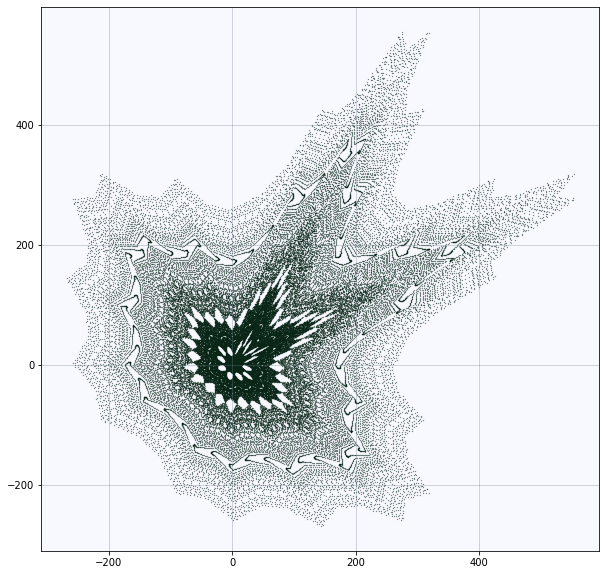

In [22]:
# бонус-пример генератора рекурсивных таблиц и 
# предварительное знакомство с модулями numpy, pylab
import numpy, pylab
def gen(a, b, n):
    i=1; xyi=[0., 0.]
    while i <= n:
        yield xyi 
        i += 1; xi, yi=xyi[0], xyi[1]
        xyi = [(1 + .01 * a) * abs(xi) - (1 + .1 ** 5 * b) * yi + 1, xi]
n=100000
a,b=7,5; xy=gen(a,b,n)
xyn=numpy.array([el for el in xy])      
pylab.figure(figsize=(10,10)) 
ax=pylab.gca()
ax.set_facecolor('ghostwhite')
pylab.scatter(
    xyn[:,0],xyn[:,1],s=.05,c=[numpy.random.random(3)/3])
pylab.grid(c='slategray',alpha=.4);

## Классификация функций по наличию аргументов
- нет аргументов
- обязательные
- именованные
- со значениями по умолчанию
- переменное количество аргументов

In [23]:
# нет аргументов
import time
def display_time():
    """
    Функция отображает точное время
    в UTC (Всемирное Координированное Время) 
    на момент ее вызова 
    """
    print(time.strftime('%X %x %Z'))
display_time()

21:41:51 01/05/23 UTC


In [24]:
# обязательные
# одинаковый порядок при определении и при вызове
import random
def random_list(n, p):
    """
    Функция генерирует список n чисел 
    в промежутке от 0 до 1 случайным образом
    и округляет все числа до p знаков после запятой
    """
    return [round(random.random(), p) for i in range(n)]
random_list(7, 3),random_list(3, 7)

([0.215, 0.857, 0.322, 0.602, 0.338, 0.222, 0.901],
 [0.5096845, 0.7277944, 0.1513762])

In [25]:
# аргументы-ключи (ключевые слова)
# произвольный порядок при вызове
def gen_table(symbol, rows, columns):
    for i in range(2 * rows + 1):
        for j in range(2 * columns + 1):
            if (i < 2 and j < 2):
                yield symbol + ' '
            else:
                el=((j + 1) % 2) * ((i + 1) % 2) * '+' +\
                   (j % 2) * ((i + 1) % 2) * '-:-' +\
                   ((j + 1) % 2) * (i % 2) * '|' +\
                   (j % 2) * (i % 2) * (' ' + symbol + ' ')
                yield el
        yield '\n'
gen=gen_table(rows=4, columns=7, symbol='*')
print(''.join(gen))

* * +-:-+-:-+-:-+-:-+-:-+-:-+
* * | * | * | * | * | * | * |
+-:-+-:-+-:-+-:-+-:-+-:-+-:-+
| * | * | * | * | * | * | * |
+-:-+-:-+-:-+-:-+-:-+-:-+-:-+
| * | * | * | * | * | * | * |
+-:-+-:-+-:-+-:-+-:-+-:-+-:-+
| * | * | * | * | * | * | * |
+-:-+-:-+-:-+-:-+-:-+-:-+-:-+



In [26]:
# значения аргументов определены по умолчанию
def gen(start=[.1, .01], max=10**12):
    """
    Функция сгенерирует установленное количество пар чисел
    на основе предыдущих значений по заданному правилу,
    начиная со стартовой пары чисел
    """
    n=1; xyn=start
    while n <= max:
        yield xyn 
        n+=1; xn, yn=xyn[0], xyn[1]
        xyn = [xn + .684 * (xn - xn ** 2 + yn),
               yn + .684 * (yn - yn ** 2 + xn)]
N=3000; XY=gen(max=N); XYN=[el for el in XY]
XYN[:5]

[[0.1, 0.01],
 [0.1684, 0.08517160000000001],
 [0.32244571936, 0.253652700610553],
 [0.6453807091372842, 0.6036956701819249],
 [1.2148518309386673, 1.208781165493924]]

In [27]:
# переменное количество аргументов
def print_args(arg0, *n_tuple):
    """
    Функция распечатает переменное количество аргументов
    """
    print("аргументы:", arg0, end=" ")
    for var in n_tuple:
        print(var, end=" ")
    print()
print_args(10)
print_args(10, 20, 30)
print_args(10, 20, 30, 40, 50)

аргументы: 10 
аргументы: 10 20 30 
аргументы: 10 20 30 40 50 


## Оператор `*` и синтаксис функций
для переменного количества
- `*args` неименованных аргументов 
- `**kwargs` аргументов-ключей

In [28]:
def f_example1(*args, **kwargs):
    for arg in args:
        print(arg)
    for key in kwargs:
        print(key, kwargs[key])
f_example1(3., [0, 1, 2], (10, 20, 30), 'Привет',
           name='Ольга', age=49, date='05/01/2023')

3.0
[0, 1, 2]
(10, 20, 30)
Привет
name Ольга
age 49
date 05/01/2023


- `*`, чтобы обеспечить после символа присутствие аргументов только из ключевых слов

In [29]:
def f_example2(name, *, age):
    print(name)
    print(age)
# убедитесь, что f_example2("Валерия", 35) выдаст ошибку
f_example2("Валерия", age=35)

Валерия
35


- для распаковки аргументов
   - `*` списки, кортежи, строки, множества
   - `**` словари

In [30]:
def f_example3(x, y, z):
    print('координаты: ', x, y, z)
# длина ряда должна совпадать
list3 = [1, 2, 3]
f_example3(*list3)
tuple3 = (10, 20, 30)
f_example3(*tuple3)
string3 = "456"
f_example3(*string3)
# длина ряда и ключи должны совпадать
dict3 = {'x': 7, 'y': 8, 'z': 9}
f_example3(**dict3)

координаты:  1 2 3
координаты:  10 20 30
координаты:  4 5 6
координаты:  7 8 9


## Задание
Назовите как можно больше случев применения оператора `*`.

In [31]:
# математические операции: умножение, возведение в степень
result = 7 * 5
print(result)
result = 7 ** 100
print(result)

35
3234476509624757991344647769100216810857203198904625400933895331391691459636928060001


In [32]:
# повторение срезов списков, кортежей, строк
zeros = (0,) * 10
print(zeros)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [33]:
# распаковка значений I
numbers = (i for i in range(7))
*start, end = numbers
print(start, type(start))
print(end, type(end))

[0, 1, 2, 3, 4, 5] <class 'list'>
6 <class 'int'>


In [34]:
# распаковка значений II
numbers = (i ** 3 for i in range(10))
*start, a, b, c = numbers
print(start, type(start))
print(a,b,c, type(a),type(b),type(c))

[0, 1, 8, 27, 64, 125, 216] <class 'list'>
343 512 729 <class 'int'> <class 'int'> <class 'int'>


In [35]:
# объединение списков, кортежей, множеств 
# со сменой типа объекта
tuple_ = (1, 2, 3)
set_ = {4, 5, 6}
list_ = [*tuple_, *set_]
print(list_)
print((*list_, *tuple_))
print({*list_, *tuple_})

[1, 2, 3, 4, 5, 6]
(1, 2, 3, 4, 5, 6, 1, 2, 3)
{1, 2, 3, 4, 5, 6}


In [36]:
# распаковка словарей
dict_a = {1: 1, '2': 2, '3': 3}
dict_b = {4: 4, '5': 5, '6': 6}
dict_c = {**dict_a, **dict_b}
print(dict_c)

{1: 1, '2': 2, '3': 3, 4: 4, '5': 5, '6': 6}


In [37]:
# если ключ повторяется
dict_a = {'1': 1, '2': 2, '3': 3}
dict_b = {'4': 4, '2': 5, '6': 6}
dict_c = {**dict_a, **dict_b}
print(dict_c)

{'1': 1, '2': 5, '3': 3, '4': 4, '6': 6}


In [38]:
# ваш код ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Классификация функций по области видимости
- с локальными аргументами (объявленными внутри)
- с глобальными (объявленными снаружи)
  - функция может изменять глобальные переменные
- с аргументами объемлющей области

In [39]:
arr = [1, 2, 3, 4, 5]
def create_arr(n):
    arr = list(range(1, n+1))
    print(arr)
def display_arr():
    global arr
    print(arr)
def transform_arr(n):
    global arr
    if n > len(arr):
        arr = list(range(1, n+1))
    print(arr)
def display_transform_arr(m, n):
    arr = list(range(1, n+1))
    def transform_arr():
        nonlocal arr, m, n
        if m > n:
            arr = list(range(n, m+1))
        return arr
    arr = transform_arr()
    print(arr)

In [40]:
# локальный аргумент arr не влияет на глобальный
create_arr(7), arr

[1, 2, 3, 4, 5, 6, 7]


(None, [1, 2, 3, 4, 5])

In [41]:
# глобальный аргумент arr использован, но не изменен
display_arr(), arr

[1, 2, 3, 4, 5]


(None, [1, 2, 3, 4, 5])

In [42]:
# глобальный аргумент arr изменился
transform_arr(9), arr

[1, 2, 3, 4, 5, 6, 7, 8, 9]


(None, [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
# аргумент в объемлющей области arr 
# изменился из-за вложенной функции
display_transform_arr(5,9)
display_transform_arr(9,5)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


## Классификация функций по объекту применения
- простые (применяются к аргументам)
- сложные (к другим функциям)

In [44]:
# бонус-пример сложной функции 
# частные производные функций по переменным
from IPython.display import display
import sympy
x,y,z,t,u,v,w=sympy.symbols('x,y,z,t,u,v,w')
A=sympy.Array(
    [[[x*sympy.cos(u)*z**2-y,x**3*u*v**6-sympy.sin(w*t)],
      [t*sympy.tan(u*w),sympy.exp(y)*z*u-w]],
     [[y**3*v**5-t,x*sympy.log(w)*z**4],
      [x-sympy.exp(z)*w**7,y*t**8*u*v]]])
display(A); print(60*'-')
for el in [x,y,z,t,u,v,w]:
    display(el, A.diff(el))

[[[x*z**2*cos(u) - y, u*v**6*x**3 - sin(t*w)], [t*tan(u*w), u*z*exp(y) - w]], [[-t + v**5*y**3, x*z**4*log(w)], [-w**7*exp(z) + x, t**8*u*v*y]]]

------------------------------------------------------------


x

[[[z**2*cos(u), 3*u*v**6*x**2], [0, 0]], [[0, z**4*log(w)], [1, 0]]]

y

[[[-1, 0], [0, u*z*exp(y)]], [[3*v**5*y**2, 0], [0, t**8*u*v]]]

z

[[[2*x*z*cos(u), 0], [0, u*exp(y)]], [[0, 4*x*z**3*log(w)], [-w**7*exp(z), 0]]]

t

[[[0, -w*cos(t*w)], [tan(u*w), 0]], [[-1, 0], [0, 8*t**7*u*v*y]]]

u

[[[-x*z**2*sin(u), v**6*x**3], [t*w*(tan(u*w)**2 + 1), z*exp(y)]], [[0, 0], [0, t**8*v*y]]]

v

[[[0, 6*u*v**5*x**3], [0, 0]], [[5*v**4*y**3, 0], [0, t**8*u*y]]]

w

[[[0, -t*cos(t*w)], [t*u*(tan(u*w)**2 + 1), -1]], [[0, x*z**4/w], [-7*w**6*exp(z), 0]]]

## Классификация функций по порядку исполнения
- последовательное выполнение действий 
- рекурсивное (обращение функции к самой себе)

In [45]:
# примеры рекурсивной функции
def recursive_sum(n):
    if n > 0:
        return n + recursive_sum(n - 1)
    return 0
recursive_sum(100)

5050

In [46]:
def is_palindrome(string):
    if len(string) <= 1:
        return True
    else:
        check = string[0] == string[-1]
        return check and is_palindrome(string[1:-1])
is_palindrome('123321')

True

In [47]:
# пример рекурсивной функции с тернарным оператором
def recursive_ternary_sum(n):
    return n + recursive_ternary_sum(n - 1) if n > 0 else 0
recursive_ternary_sum(100)

5050

In [48]:
# пример рекурсивного генератора
def recursive_generator(lst):
    if lst:
        yield lst[0] ** 2
        yield from recursive_generator(lst[1:])
rg = recursive_generator(range(5))
list(rg)

[0, 1, 4, 9, 16]

## Задание
Создайте любой рекурсивный генератор

In [49]:
# ваш код ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Классификация функций по способу обращения к ней
- именованная (с ключевыми словами `def`, `return`)
- анонимная (с ключевым словом `lambda`)

### Применение анонимной функции

In [50]:
# для вычисления отдельных значений
f1 = lambda x: x ** 2 + 10
print(f1(1), f1(4))
f2 = lambda x: x % 2 == 0
print(f2(1), f2(4))

11 26
False True


In [51]:
# для вычисления значений интервала, списка или кортежа
list(map(lambda x: x ** 2 + 10, range(5)))

[10, 11, 14, 19, 26]

In [52]:
# для фильтрации значений интервала, списка или кортежа
list(filter(lambda x: x % 2 == 0, range(5)))

[0, 2, 4]

In [53]:
# для создания группы функций
def power_n(n):
    return lambda x: x ** n
power2, power3, power4 = (power_n(i) for i in (2,3,4))
power2(7), power3(5), power4(2)

(49, 125, 16)

In [54]:
# как ключ сортировки
lst = [-1, -5, -2, 3, 1, 7, -3, 4, -8]
sorted_lst_abs = sorted(lst, key=lambda x: abs(x))
print(sorted_lst_abs)

[-1, 1, -2, 3, -3, 4, -5, 7, -8]


In [55]:
# для многократного применения функции к элементам коллекции
# с "накопительным" итогом согласно лямбда-закономерности
from functools import reduce
lst = list(range(1,11))
lst_sum = reduce(lambda x, y: x + y, lst)
print(lst_sum)
lst_prod = reduce(lambda x, y: x * y, lst)
print(lst_prod)

55
3628800


## Задание
Найдите еще способы применения лямбда-функций

In [56]:
# ваш код ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ